# Unit 5 - Financial Planning

In [30]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
monthly_income = 12000


In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [34]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()

# Fetch current ETH price
my_eth = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = my_btc["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value BTC is ${my_btc_value:0.2f}")
print(f"The current value ETH is ${my_eth_value:0.2f}")


The current value BTC is $23016.00
The current value ETH is $1634.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret
# alpaca_api_key = os.getenv("APCA_API_KEY_ID")
# alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [38]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_stock_dataortfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_dataortfolio[df_stock_dataortfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_dataortfolio[df_stock_dataortfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_dataortfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_stock_dataortfolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [39]:
# Pick AGG and SPY close prices
agg_close_price = df_stock_dataortfolio["AGG"]["close"][0]
spy_close_price = df_stock_dataortfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [40]:
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg


In [41]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value  SPY shares is ${my_spy_value}")
print(f"The current value AGG shares is ${my_agg_value}")

The current value  SPY shares is $16728.5
The current value AGG shares is $23886.0


### Savings Health Analysis

In [42]:
my_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19270468,
   'total_supply': 19270468,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 23016.0,
     'volume_24h': 38490688201,
     'market_cap': 443582275197,
     'percentage_change_1h': -0.571714728908417,
     'percentage_change_24h': 0.884799025219011,
     'percentage_change_7d': 10.3695089010973,
     'percent_change_1h': -0.571714728908417,
     'percent_change_24h': 0.884799025219011,
     'percent_change_7d': 10.3695089010973}},
   'last_updated': 1674501297}},
 'metadata': {'timestamp': 1674501297,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [43]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
print(savings_data)
# Create savings DataFrame
savings_df = pd.DataFrame(
    savings_data,
    columns=["amount"],
    index=["crypto", "shares"])

# Display savings DataFrame
display(savings_df)

[24650.78, 40614.5]


,amount
crypto,24650.78
shares,40614.50


<AxesSubplot:title={'center':'Portfolio Composition - 2020-07-14 '}, ylabel='amount'>

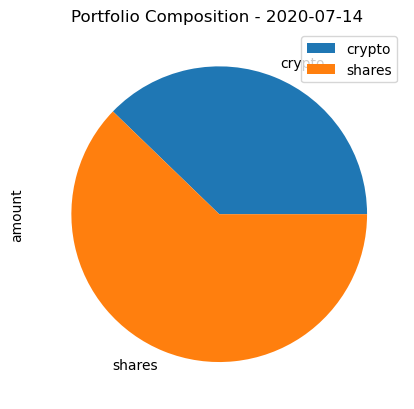

In [44]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - 2020-07-14 ')

In [45]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
total_savings = savings_data[0] + savings_data[1]
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print("congratulations, you have enough money in this fund")
elif total_savings == emergency_fund:
    print("congratulations for reaching this important financial goal.")
else:
     print(f"you are ${total_savings - emergency_fund} away from reaching you goal")


36000
65265.28
congratulations, you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [46]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
five_years_agg = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
five_years_spy = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([five_years_agg,five_years_spy],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_stock_data

# # Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years_cumulative_returns = MCSimulation(
    portfolio_data = df_stock_data ,
    weights=[.6,.4],
    num_simulation=500,
    num_trading_days=252*30
)
thirty_years_cumulative_returns


In [49]:
# Printing the simulation input data
thirty_years_cumulative_returns.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13520  114.706244    -0.000871  417.44   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.93   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.81   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.32   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.63   

                                                                              \
                             high       low     close     volume trade_count   
timestamp                                                                      
2016-05-02 04:00:00+00:00  208.18  206.4100  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.7200   89131004      340335   
...                           ...       ...       ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.6100   51824860      295870   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.5200   50297139      296300   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.4000   50692781      330049   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.0600   76965583      443396   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.3000   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.508245     0.002088  
2021-04-27 04:00:00+00:00  417.481360    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.824046     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [50]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years_cumulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lilybro/Desktop/Folders/Fintech-Workspace/HomeworkRepo/Fin-challenge5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000034,1.004714,1.006046,1.000534,0.994785,1.004362,1.004933,1.001281,1.004442,1.004862,...,1.000615,1.003124,0.999864,0.990210,0.998468,0.998282,1.009323,1.002716,0.996002,0.994818
2,1.004410,1.011109,1.004748,0.999184,1.001604,1.009491,1.005271,1.006178,1.009253,1.006712,...,0.990153,1.007160,1.004343,0.994127,0.994604,1.001488,1.004552,1.007842,0.996624,0.986726
3,1.009585,1.012085,1.004560,0.994910,1.002056,1.013476,1.003851,1.005116,1.001628,1.013901,...,0.987239,1.006963,1.010364,0.990236,0.992617,1.000380,1.004306,1.014506,0.996044,0.993685
4,1.004686,1.012472,1.004562,0.993423,0.998339,1.010732,1.001477,1.003219,0.997197,1.016658,...,0.979677,1.009619,1.010815,0.985917,0.987493,0.998357,1.001258,1.008062,0.996938,0.996171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.502055,4.533332,9.074270,3.923915,5.911671,9.315194,8.114658,6.098197,4.550373,12.296323,...,9.303963,13.423233,4.464303,11.664471,7.090605,4.584801,6.116749,10.505948,3.383503,3.532837
7557,8.511863,4.550060,9.070709,3.904950,5.915740,9.332782,8.134810,6.121619,4.514160,12.311909,...,9.343299,13.450062,4.462155,11.543352,7.101884,4.594114,6.122971,10.493526,3.373503,3.496456
7558,8.515519,4.577725,9.045240,3.923918,5.926462,9.380361,8.110075,6.105514,4.532320,12.221750,...,9.386572,13.412032,4.450977,11.583783,7.086742,4.594792,6.142437,10.496354,3.388864,3.471864
7559,8.509053,4.567919,9.085977,3.897579,5.948003,9.378475,8.114982,6.117775,4.548739,12.223988,...,9.282285,13.445941,4.462536,11.591653,7.145138,4.568751,6.159196,10.544730,3.399208,3.477930


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

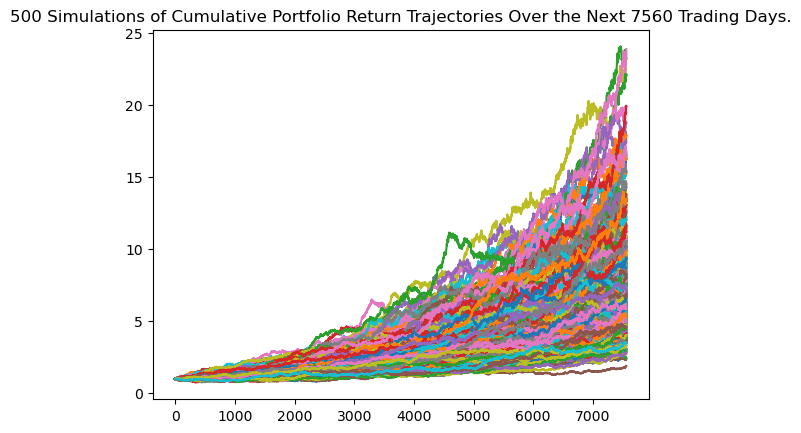

In [51]:
# Plot simulation outcomes
thirty_years_cumulative_returns.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

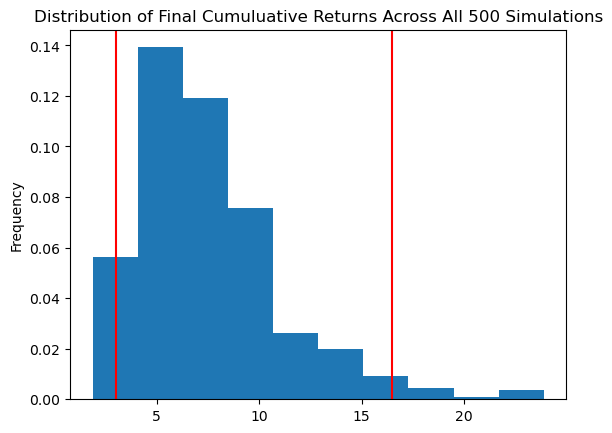

In [52]:
# Plot probability distribution and confidence intervals
thirty_years_cumulative_returns.plot_distribution()

### Retirement Analysis

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_statistics = thirty_years_cumulative_returns.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_statistics)


count           500.000000
mean              7.485611
std               3.485551
min               1.893080
25%               5.007445
50%               6.829664
75%               9.137846
max              23.868917
95% CI Lower      3.021015
95% CI Upper     16.477270
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [54]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_summary_statistics[8] * 20000
ci_upper = MC_summary_statistics[9] * 20000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60420.29147284113 and $329545.40836223296


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [55]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_summary_statistics[8] * initial_investment
ci_upper = MC_summary_statistics[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90630.43720926168 and $494318.11254334945


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [58]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [59]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [1]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 5 years will end within in the range of"
#       f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


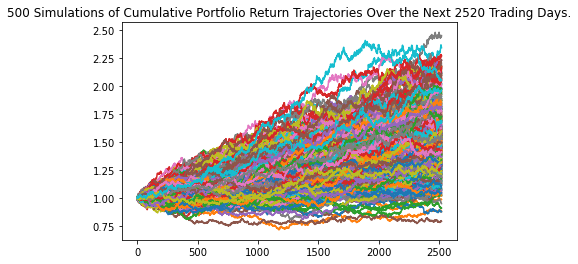

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

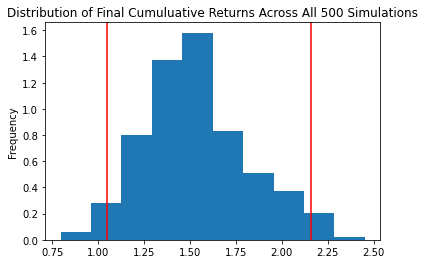

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
